# PROJECT:

Table of contents:
1. Overview
2. Breast Cancer Wisconsin (Diagnostic) Dataset
3. Code

# Overview:

<b> Goal of healthcare: </b>
1. Mortality
2. Disability
3. Morbidity


<b> Breast Cancer </b>
<br> 1 in 8 women will be diagonosed with breast cancer
<br> Factors:
- Older ages
- Dense breasts
- Having breast cancer before
- Parent or siblings
- Inherited gene
- Alcohol use
- Overweight

# Breast Cancer Wisconsin (Diagnostic) Data *Set*

### About Dataset

- Breast tumors have traditionally been diagnosed through an invasive surgical procedure called a full biopsy. A tiny sample of tumor tissue can be examined using fine needle
aspiration (FNAs).
- Applying interactive image processing methods when combined with an inductive classifier based on linear programming, a highly accurate breast tumor diagnosis system was
developed. An active contour model referred to as a "snake" in the literature locates
the actual boundary of the cell nucleus after setting up with a user-defined approximate
boundary through initialization. After following this method of analysis, 569 images were
evaluated and various combinations of features were evaluated to determine which best
differentiate between benign and malignant samples. Using a single separation plane, tenfold cross-validation accuracy of 97 % was attained on three out of the thirty features:
mean texture, worst area, and worst smoothness. This is an improvement to compared
to the best diagnostic the results described in the medical literature.
- However, a number of features are believed to be correlated with cancer, and the
process is still quite subjective and dependent on the knowledge and experience of a
physician. In order to increase the speed, correctness, and objectivity of the diagnosis
process, we have used image processing and machine learning techniques
- Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

### Attribute Information:



<b> 1: </b> ID number <br>
<b> 2: </b> Diagnosis (M = malignant, B = benign) <br>
<b> 3-32: </b> Ten real-valued features are computed for each cell nucleus: <br>
- $radius$ (mean of distances from center to points on the perimeter)
- $ texture$ (standard deviation of gray-scale values)
- $ perimeter$
- $ area$
- $ smoothness$ (local variation in radius lengths)
- $ compactness = \frac{perimeter^2}{area - 1.0}$
- $ concavity$ (severity of concave portions of the contour)
- $concave points$ (number of concave portions of the contour)
- $symmetry$
- $fractal dimension$ ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

Utilizing interactive image processing methods in conjunction with an inductive classifier based on linear programming, a highly accurate breast tumor identification system was developed. A little portion of a slide aspirated with a fine needle is chosen, then digitalized. Active contour models, also referred to as snakes, are initialized by the user through an interactive interface in close proximity to a group of cell nuclei. The bespoke serpents are distorted to precisely resemble the nuclei. This makes it possible to analyze nuclear size, shape, and texture precisely and automatically. For every nucleus, ten such features are calculated, and the range of isolated cells is used to determine the mean value, biggest (or "worst") value, and standard error of each featur
e. After 569 images were analyzed in this fashion, different combinations of features were tested to find those which best separate benign from malignant samples. Ten-fold cross-validation accuracy of 97% was achieved using a single separating plane on three of the thirty features: mean texture, worst area and worst smoothness. This represents an improvement over the best diagnostic results in the medical literature. The system is currently in use at the University of Wisconsin Hospitals. The same feature set has also been utilized in the much more difficult task of predicting distant recurrence of malignancy in patients, resulting in an accuracy of 8 </br>
- Missing values: 0
- Class distribution: 357 benign, 212 malignantant

### Import dataset




#### Installing packages

In [ ]:
pip install ucimlrepo

#### Import importance packages

In [ ]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from seaborn import boxplot

We only examine the original data, comprising 32 columns.

---



In [ ]:
#Breast Cancer Wisconsin (Diagnostic)
breast_cancer_dataset = fetch_ucirepo(name = "Breast Cancer Wisconsin (Diagnostic)")
breast_cancer = breast_cancer_dataset["data"]["original"]

#### Plotting the dataset

In [ ]:
breast_cancer.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,842302,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,...,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,M
1,842517,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,...,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,M
2,84300903,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,...,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,M
3,84348301,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,...,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,M
4,84358402,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,...,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,M


In [ ]:
breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.000,30371831.432,125020585.612,8670.000,869218.000,906024.000,8813129.000,911320502.000
radius1,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
texture1,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
perimeter1,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
area1,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
smoothness1,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
compactness1,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
concavity1,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
concave_points1,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
symmetry1,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304


<Axes: xlabel='Diagnosis', ylabel='count'>

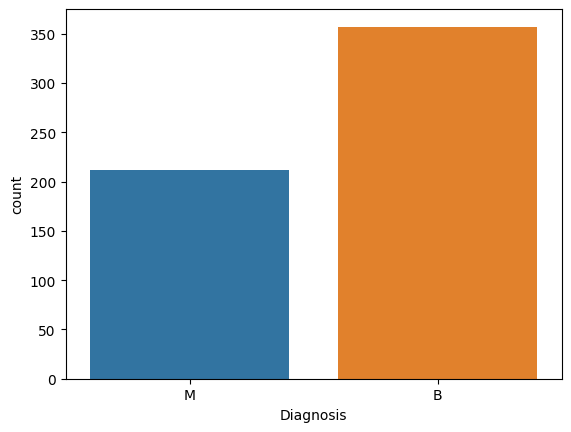

In [ ]:
# Target variable
sns.countplot(breast_cancer, x="Diagnosis")

The data is biased since there are more benign diagnoses than malignant ones.

It is important to ensure that the data is balanced because imbalanced data can result in biased models. The model is more likely to pick up on the patterns of the majority class and ignore the patterns of the minority class when the training data is imbalanced. Inaccurate projections for the minority class may result from this, which could cause issues in practical implementations.


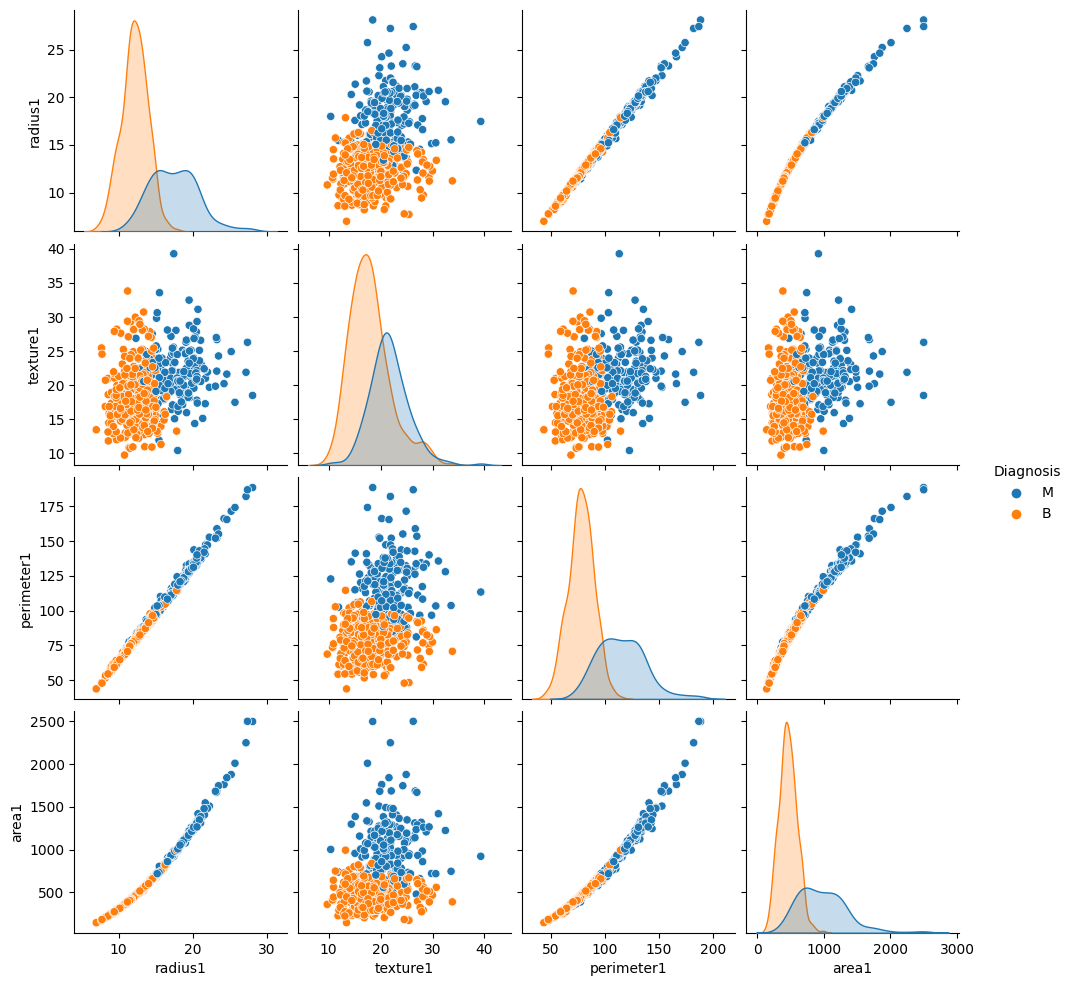

In [ ]:
sns.pairplot(breast_cancer, vars = breast_cancer.iloc[:, 1:5].columns, hue = 'Diagnosis')
plt.show()

The pairplot shows the pairwise relationships between the five variables in the dataset: $texture1$, $area1$, $perimeter1$, $radius1$, and $Diagnosis$.

1. $texture1$ and $radius1$
- The scatter plot between texture1 and radius1 shows a weak negative correlation. This means that there is a slight tendency for objects with more texture to have smaller radius. However, the correlation is not very strong

2. $area1$ and $perimeter1$
- The scatter plot between area1 and perimeter1 shows a strong positive correlation. This means that as area1 increases, perimeter1 also tends to increase. This is reasonable, as perimeter is directly related to area.

4. $perimeter1$ and $radius1$
- The scatter plot between perimeter1 and radius1 shows a strong positive correlation. This means that as perimeter1 increases, radius1 also tends to increase. This is reasonable, as perimeter is directly related to radius.
4. $Diagnosis$ and $texture1, area1, perimeter1$ and $radius1$
- The distribution of texture1, area1, perimeter1, and radius1 differs for the two classes, as the Diagnosis box plots demonstrate. For instance, the B class's median area is larger than the M class's. This implies that these factors might be helpful in diagnosing a patient."

We can also learn the following additional information from the pairplot:
- All four variables show a considerable degree of overlap between the two classes. This implies that creating a classification model with perfect accuracy might be challenging.
- Higher values for areal, perimeter1, and radius1 and lower values for texture1 are typically found in the B class.

<b> Overall </b> </br>
A great overview of the connections between the five variables in the dataset is given by the pairplot. It is evident that certain correlations exist between the variables and that the type of diagnosis affects these correlations. Using this data, a classification model for diagnosis prediction could be created.


#### Preprocessing

First, we have to drop <b> ID </b> column and change values of <b> Diagonosis </b> column into binary number

In [ ]:
#Drop ID
pre_data = breast_cancer.drop('ID',axis = 1)
#Turn to binary
diag_dct = {'B' : 0, 'M':  1}
pre_data['Diagnosis'] =  [diag_dct[n] for n in pre_data['Diagnosis']]
#Split data into target and data
target = pre_data['Diagnosis']
data = pre_data.drop('Diagnosis',axis=1)

##### Resample

It is important to ensure that the data is balanced because imbalanced data can result in biased models. The model is more likely to pick up on the patterns of the majority class and ignore the patterns of the minority class when the training data is imbalanced. Inaccurate projections for the minority class may result from this, which could cause issues in practical implementations.
There are a lots of way to dealing with imbalance data, but in this case we using undersample because the data is high correlation.

Undersampling is a technique used to balance imbalanced datasets in machine learning. It involves removing data points from the majority class until it matches the size of the minority class. This can help to improve the accuracy of classification models by ensuring that they are trained on a more balanced dataset.
1. <b> Advantages: </b>
- Can be effective for balancing imbalanced datasets.
- Can improve the accuracy of classification models.
- Is relatively easy to implement.

2. <b>Disadvantages: </b>
- Can discard valuable data from the majority class.
- Can lead to overfitting, especially on small datasets.
- Can be sensitive to the choice of undersampling technique.

In [ ]:
from sklearn.utils import resample
# Separate majority and minority classes

df_majority = pre_data[pre_data['Diagnosis']==0]
df_minority = pre_data[pre_data['Diagnosis']==1]

# Upsample minority class
df_minority_upsampled = resample(df_majority,
                                 replace=True,     # sample with replacement
                                 n_samples=df_minority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_minority_upsampled])

# # Display new class counts
df_upsampled['Diagnosis'].value_counts()
pre_data = df_upsampled

<Axes: xlabel='Diagnosis', ylabel='count'>

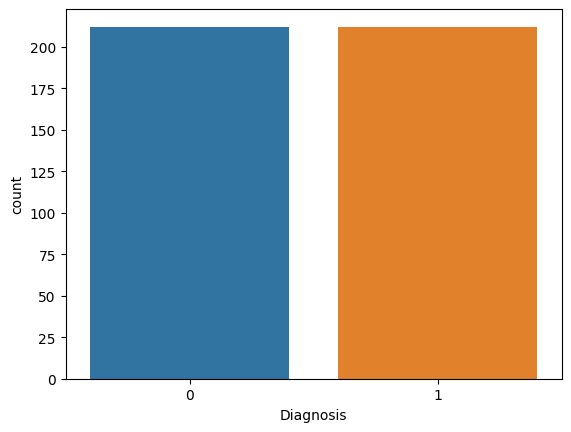

In [ ]:
sns.countplot(pre_data, x="Diagnosis")

##### Feature selection

Finding and choosing the most pertinent features from a dataset to use in the construction of a machine learning model is known as feature selection. It is a crucial stage in the machine learning process because it can shorten the training period, increase the model's interpretability, and enhance accuracy and performance.

- The Variance Inflation Factor <b>(VIF) </b> score is a measure of the severity of multicollinearity in regression analysis. Multicollinearity occurs when there is a high correlation between two or more independent variables. This can lead to problems with the regression model, such as inflated standard errors and biased estimates of the regression coefficients.

- For every independent variable in the regression model, the VIF score is determined. It can be defined as the ratio between the variance of the regression coefficient for that variable when it is regressed on a constat and the variance of the regression coefficient when it is regressed on the other independent variables in the model.

- A higher level of multicollinearity is indicated by higher VIF scores. No multicollinearity is indicated by a VIF score of 1, and severe multicollinearity is indicated by a VIF score of 5 or higher.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data
#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
#Drop column with highest VIF score
while any(vif_data.VIF>10):
    X = X.drop(''.join(vif_data.feature[vif_data.VIF == max(vif_data.VIF)]),axis=1)
    vif_data = vif_data.drop(vif_data.index[vif_data.VIF == max(vif_data.VIF)],axis=0)
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

#Feature selection
data = X
vif_data = vif_data.sort_values(by = "VIF",ascending=False)
vif_data

,feature,VIF
18,symmetry2,8.648
14,smoothness2,8.348
19,fractal_dimension2,7.645
11,texture2,7.104
16,concavity2,6.667
26,concavity3,4.620
13,area2,2.191


<Axes: xlabel='VIF', ylabel='feature'>

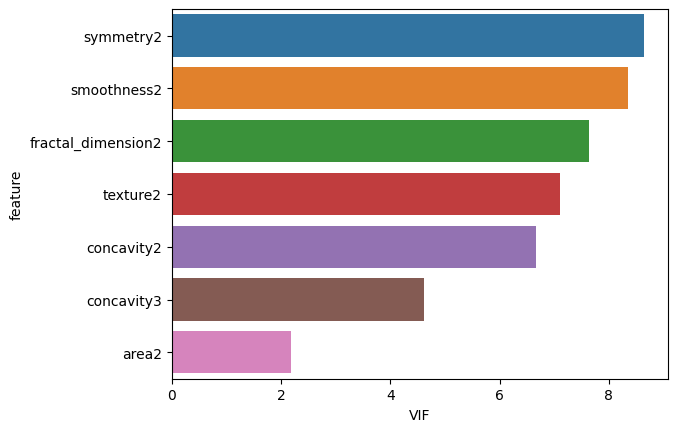

In [ ]:
sns.barplot(y=vif_data.feature, x=vif_data.VIF)

Only seven of the thirty features with the lowest VIF scores were selected after iteration in order to assess our model.

##### Standardization
Data preprocessing method called standardization entails scaling and centering the data. It is a method frequently employed in machine learning to enhance model performance.
<br> Standardization in machine learning for a number of reasons:.

- To increase the effectiveness of machine learning modeer.
- Making the data easier to interpri
- Standardization can help to reduce the risk of overfitting by making the data more generalizable.

<Axes: >

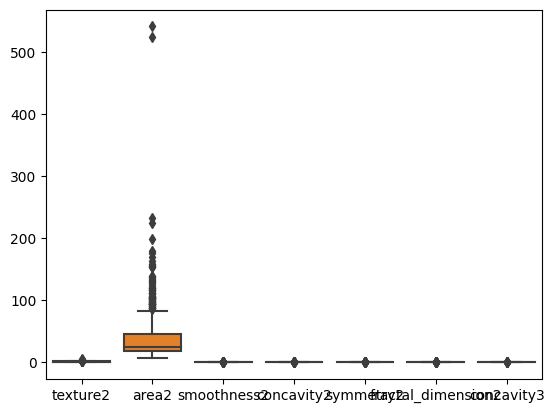

In [ ]:
boxplot(data)

We decide to scale to a unit variance and remove the mean to standardize the characteristics.

The standard score of a sample x is calculated as:
$z = \frac{(x - u)}{s}$

In [ ]:
from sklearn.preprocessing import StandardScaler

pre_data_scaled = StandardScaler().fit_transform(data)
scaled_df = pd.DataFrame(pre_data_scaled)
#Passing Scaled DataFrame to Preprocessing DataFrame
data.iloc[:,0:len(scaled_df.columns)] = scaled_df

<Axes: >

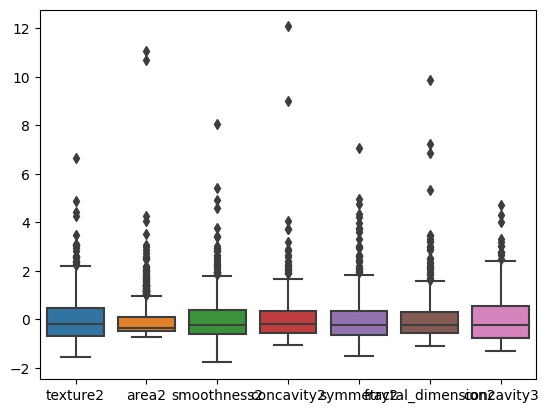

In [ ]:
boxplot(data)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
texture2,569.000,-0.000,1.001,-1.554,-0.695,-0.197,0.467,6.655
area2,569.000,-0.000,1.001,-0.738,-0.495,-0.348,0.107,11.042
smoothness2,569.000,-0.000,1.001,-1.776,-0.624,-0.220,0.368,8.030
concavity2,569.000,0.000,1.001,-1.058,-0.557,-0.199,0.337,12.073
symmetry2,569.000,0.000,1.001,-1.533,-0.652,-0.219,0.356,7.072
fractal_dimension2,569.000,-0.000,1.001,-1.097,-0.585,-0.230,0.289,9.852
concavity3,569.000,0.000,1.001,-1.306,-0.757,-0.218,0.531,4.701


##### Dimensional reduction

Dimensional reduction is the process of reducing the number of features in a dataset while retaining as much of the important information as possible. This can be useful for a number of reasons, including:

- <b> Improving the performance of machine learning models </b>: Overfitting can occur when machine learning models are trained on datasets with too many features. Dimensional reduction can help to reduce the dimensionality of the data and prevent overfitting.
- <b>Visualizing data</b>: It can be difficult to visualize high-dimensional data. Dimensional reduction can help to reduce the dimensionality of the data to two or three dimensions, which can make it easier to visualize.
- <b>Interpreting data</b>: It can be difficult to interpret the relationships between features in high-dimensional data. Dimensional reduction can help to identify the most important features and understand their relationships.

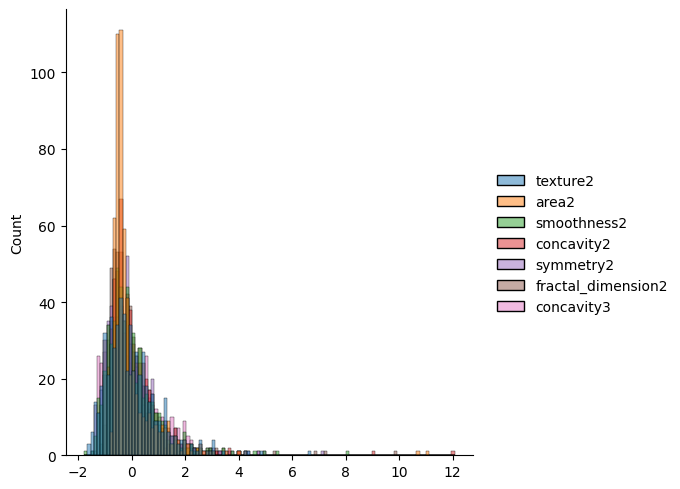

In [ ]:
sns.displot(data)

Principal component analysis <b>(PCA)</b> is a statistical technique for dimensionality reduction. It works by identifying the principal components of a dataset. The principal components are the linear combinations of the original features that explain the most variance in the data.
PCA is a popular technique for dimensionality reduction because it is simple to implement and effective at preserving the important information in the data. It can be used to improve the performance of machine learning models, visualize high-dimensional data, and interpret data.

##### Plotting data

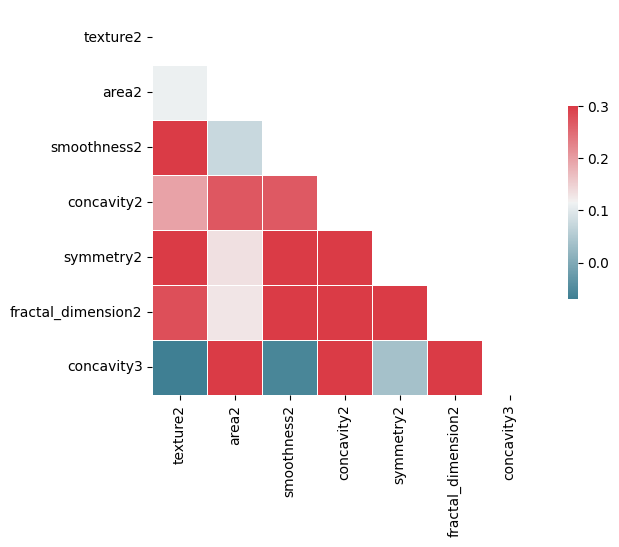

In [ ]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

Smoothness2 is highly correlated with petal width and sepal length; sepal length is negatively correlated with the other three variables.

Text(0.5, 0, 'component 2')

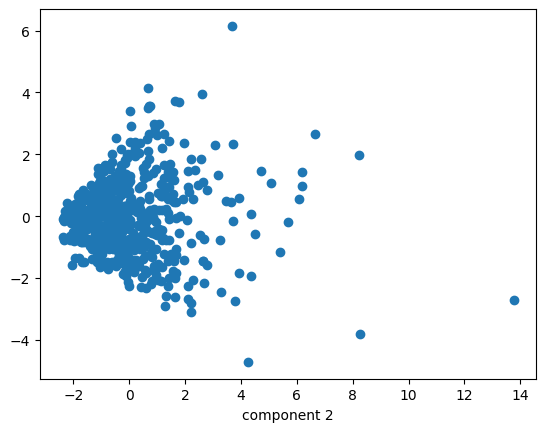

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =3)
pca.fit(data)
data = pca.transform(data)

ax1 = plt.axes()
ax1.scatter(data[:, 0], data[:, 1])
ax1.set_xlabel('component 1')
ax1.set_xlabel('component 2')

Text(0.5, 0, 'component 3')

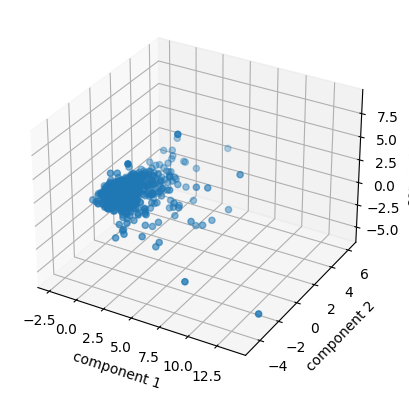

In [ ]:
ax2 = plt.axes(projection='3d')
ax2.scatter(data[:, 0], data[:, 1],data[:, 2])
ax2.set_xlabel('component 1')
ax2.set_ylabel('component 2')
ax2.set_zlabel('component 3')

# Code

#### Import importance packages for Machine Learning

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

#### Code

In [ ]:
#Make the train and test cases
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3 ,stratify=target, random_state=70)
print(X_train.shape,y_train.shape)

(398, 3) (398,)


<b> Logistic Regression </b>

In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

Accuracy on the training set: 0.915
Accuracy on the test set: 0.947


[[240  10]
 [ 24 124]]


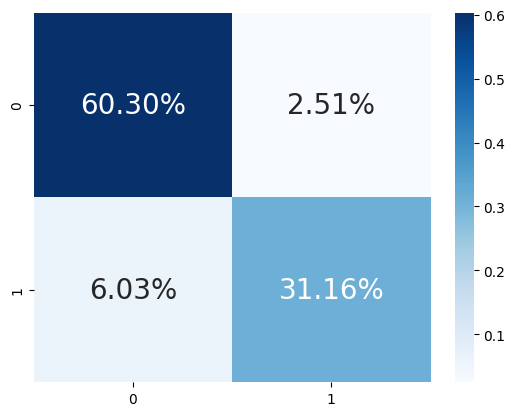

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = log_reg.predict(X_train)
cf_matrix = confusion_matrix(y_train , y_pred)

#Plot logistic regression curve
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,annot_kws={'size':20},
            fmt='.2%', cmap='Blues')
print(cf_matrix)

In this confusion matrix, the following percentages can be observed:
- TP: 60.30%
- TN: 31.16%
- FP: 6.03%
- FN: 2.51%

This means that the model correctly predicted 60.30% of the positive samples and 31.16% of the negative samples. However, it also made some mistakes, incorrectly predicting 6.03% of the negative samples as positive and 2.51% of the positive samples as negative.

Overall, the model has a relatively good accuracy, with a total accuracy of 91.46 ($\frac{TP + TN}{total samples}$).

<b> KNN Classifier (KNN) </b>

Accuracy of the training set for 6NN: 0.919598
Accuracy of the test set for 6NN: 0.906433


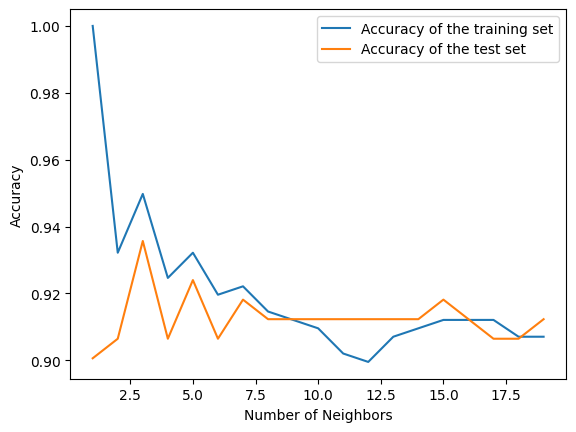

In [ ]:
#KNN Classifier
training_accuracy = []
test_accuracy = []

#Try KNN for diffrent k nearest neighbor from 1 to 20
neighbors_setting = range(1,20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

print("Accuracy of the training set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6NN: {:3f}".format(test_accuracy[5]))

[[243   7]
 [ 20 128]]


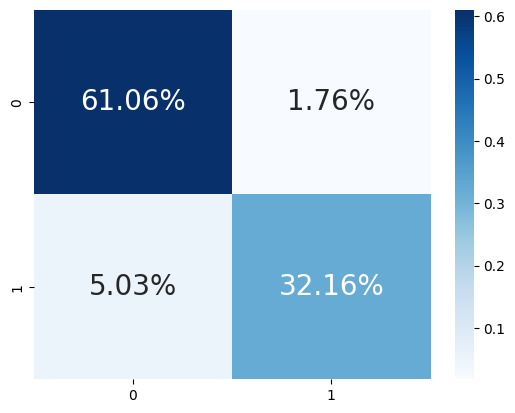

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_train)
cf_matrix = confusion_matrix(y_train , y_pred)

#Plot logistic regression curve
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,annot_kws={'size':20},
            fmt='.2%', cmap='Blues')
print(cf_matrix)

Overall, the model has a relatively good accuracy, with a total accuracy of 91.22%

<b> Support Vector Machine (SVM) </b>

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100],
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel': ['linear']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
best_params = grid.best_params_
print(f"Best params: {best_params}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
#Support Vector Machine
svm = SVC(**best_params,probability=True)
svm.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(svm.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(svm.score(X_test,y_test)))

Accuracy on the training set: 0.917
Accuracy on the test set: 0.947


[[240  10]
 [ 23 125]]


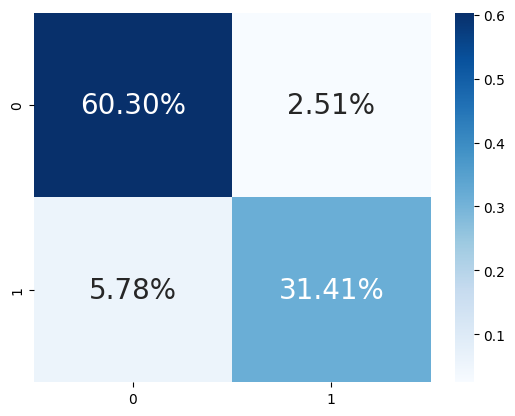

In [ ]:
y_pred = svm.predict(X_train)
cf_matrix = confusion_matrix(y_train , y_pred)

#Plot SVM curve
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,annot_kws={'size':20},
            fmt='.2%', cmap='Blues')
print(cf_matrix)

The model also has a relatively good accuracy, with a total accuracy of 91.71%

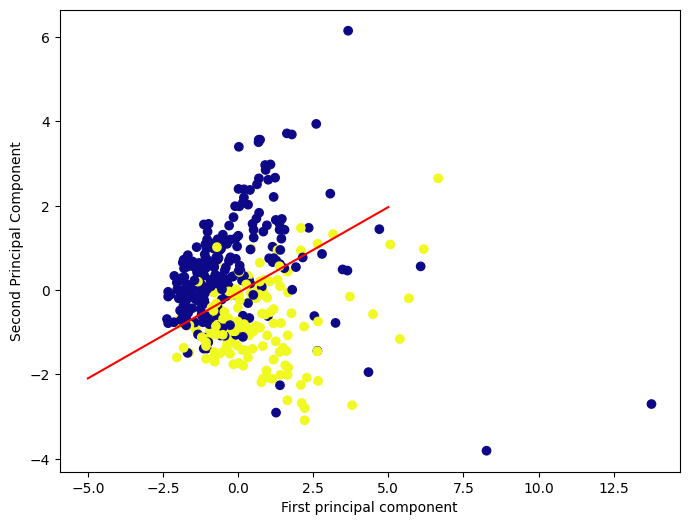

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

w = svm.coef_[0]
b = svm.intercept_[0]
x1 = np.linspace(-5, 5)
x2 = -(w[0] * x1 + b) / w[1]
plt.plot(x1, x2, 'r')

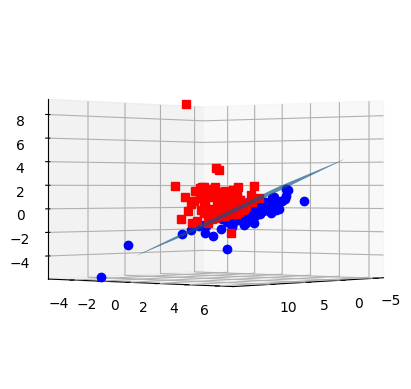

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#Make it binary classification problem
X = X_train[np.logical_or(y_train==0,y_train==1)]
Y = y_train[np.logical_or(y_train==0,y_train==1)]


z = lambda x,y: (-svm.intercept_[0]-svm.coef_[0][0]*x -svm.coef_[0][1]*y) / svm.coef_[0][2]
tmp = np.linspace(-5,5,50)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(0, 40)
plt.show()

In [ ]:
actr2 = knn_scoretrain = training_accuracy[6]
acts2 = knn_scoretest = test_accuracy[6]
actr1 = log_reg.score(X_train,y_train)
acts1 = log_reg.score(X_test,y_test)
actr3 = svm.score(X_train,y_train)
acts3 = svm.score(X_test,y_test)


results=pd.DataFrame({'Model':['LogisticRegression','KNeighbors','SVM'],
                    'Test Score':[acts1,acts2,acts3],
                    'Train Score':[actr1,actr2,actr3]})
result_df=results.sort_values(by='Train Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

,Test Score,Train Score
Model,,
KNeighbors,0.918,0.922
SVM,0.947,0.917
LogisticRegression,0.947,0.915
